In [1]:
from EM import* 
from time import time
from generate import GM_sample
%matplotlib inline

# Test of our implementations

We want to test our implementations on a simple dataset that we generated in order to see if they work. This dataset consists of 1000 observations from 3 Gaussian vectors of size 2.

In [2]:
X = np.load("Datasets/dataset_1K_separable_X.npy")
y = np.load("Datasets/dataset_1K_separable_y.npy")

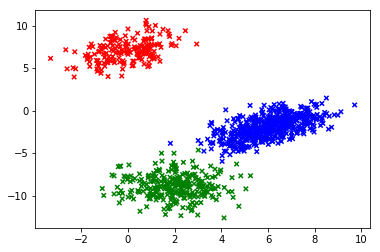

In [3]:
N,d = X.shape
K = len(np.unique(y))
colors = [x for x in 'rbg']
colors = np.hstack([colors]*N)
plt.scatter(X[:,0],X[:,1],marker='x',s=20,color=colors[y].tolist())

Let's run first our implementation without Spark

In [5]:
EM_ = EM_noSpark()
clustering = EM_.fit_predict(X, n_clusters=K, verbose=True)

Iteration 1
| log-likelihood = -5538.04582378
Iteration 2
| log-likelihood = -5534.69636926
Iteration 3
| log-likelihood = -5523.98051212
Iteration 4
| log-likelihood = -5478.77013773
Iteration 5
| log-likelihood = -5344.92393236
Iteration 6
| log-likelihood = -5109.06482018
Iteration 7
| log-likelihood = -4637.74977825
Iteration 8
| log-likelihood = -4507.61875773
Iteration 9
| log-likelihood = -4503.92562602
Iteration 10
| log-likelihood = -4502.04304901
Iteration 11
| log-likelihood = -4500.82643273
Iteration 12
| log-likelihood = -4499.12772584
Iteration 13
| log-likelihood = -4495.3147203
Iteration 14
| log-likelihood = -4489.05800907
Iteration 15
| log-likelihood = -4476.18437673
Iteration 16
| log-likelihood = -4454.75843678
Iteration 17
| log-likelihood = -4428.77880234
Iteration 18
| log-likelihood = -4403.96162097
Iteration 19
| log-likelihood = -4380.88372621
Iteration 20
| log-likelihood = -4358.27329114
Iteration 21
| log-likelihood = -4336.08362198
Iteration 22
| log-like

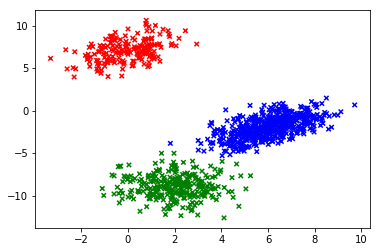

In [6]:
plt.scatter(X[:,0],X[:,1],marker='x',s=20,color=colors[clustering].tolist())

We get a very good clustering (one may need to run the algorithm several times to get this result because of the convergence to a local optimum of the EM algorithm).

Let's run our implementation with Spark now.

In [7]:
rdd = sc.parallelize(X)

In [8]:
EM = EM_Spark()
clustering_spark = EM.fit_predict(rdd, n_clusters=K, verbose=True)

Iteration 1
| log-likelihood = -4578.27074909
Iteration 2
| log-likelihood = -4154.29457656
Iteration 3
| log-likelihood = -4112.46049313
Iteration 4
| log-likelihood = -4111.9878714
Iteration 5
| log-likelihood = -4111.97636489
Iteration 6
| log-likelihood = -4111.97592828
Converged


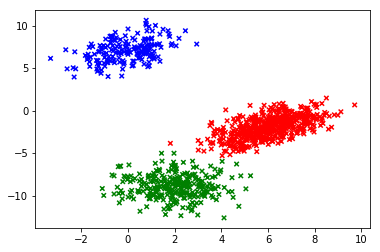

In [10]:
plt.scatter(X[:,0],X[:,1],marker='x',s=20,color=colors[clustering_spark].tolist())

We get a very good clusterin too (one may need to run the algorithm several times to get this result because of the convergence to a local optimum of the EM algorithm).